# Data Cleaning - Airbnb NYC Listings
## Internship Project
This project focuses on cleaning the Airbnb NYC dataset to ensure data integrity and reliability for analysis.

## 1. Data Loading & Initial Exploration

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Display first few rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 2. Data Integrity Check

In [12]:
# Checking for missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## 3. Handling Missing Data

In [13]:
# Fill missing reviews_per_month with 0
df['reviews_per_month'].fillna(0)

# Drop rows with missing host_name or last_review
df.dropna(subset=['host_name', 'last_review'], inplace=True)

## 4. Duplicate Removal

In [14]:
# Remove duplicate listings
df.drop_duplicates(subset=['id'], inplace=True)

## 5. Standardization & Formatting

In [15]:
# Convert last_review to datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

## 6. Outlier Detection & Handling

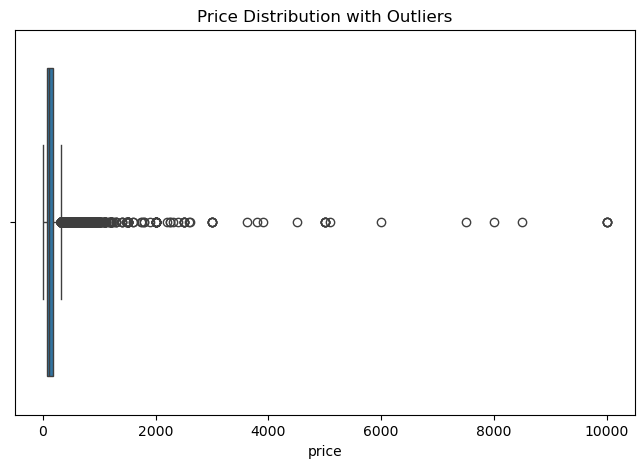

In [16]:
# Identifying outliers in price
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title('Price Distribution with Outliers')
plt.show()

# Removing extreme price outliers
df = df[df['price'] <= 500]

## 7. Final Data Overview

In [17]:
# Check dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38205 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38205 non-null  int64         
 1   name                            38199 non-null  object        
 2   host_id                         38205 non-null  int64         
 3   host_name                       38205 non-null  object        
 4   neighbourhood_group             38205 non-null  object        
 5   neighbourhood                   38205 non-null  object        
 6   latitude                        38205 non-null  float64       
 7   longitude                       38205 non-null  float64       
 8   room_type                       38205 non-null  object        
 9   price                           38205 non-null  int64         
 10  minimum_nights                  38205 non-null  int64         
 11  number_

## 8. Insights & Business Benefits
- **Accurate Analysis**: Reliable data leads to better business decisions.
- **Improved Pricing Strategies**: Outlier removal allows realistic pricing.
- **Enhanced Data Quality**: Eliminating duplicates prevents biased results.
- **Better User Experience**: Clean data improves Airbnb search accuracy.